## Heart Disease

#### Problem Statement
- This task relates to the final model creation aspect of the analysis. The requirement is to build the final model with the highest performance scores.

### **Introduction**
World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


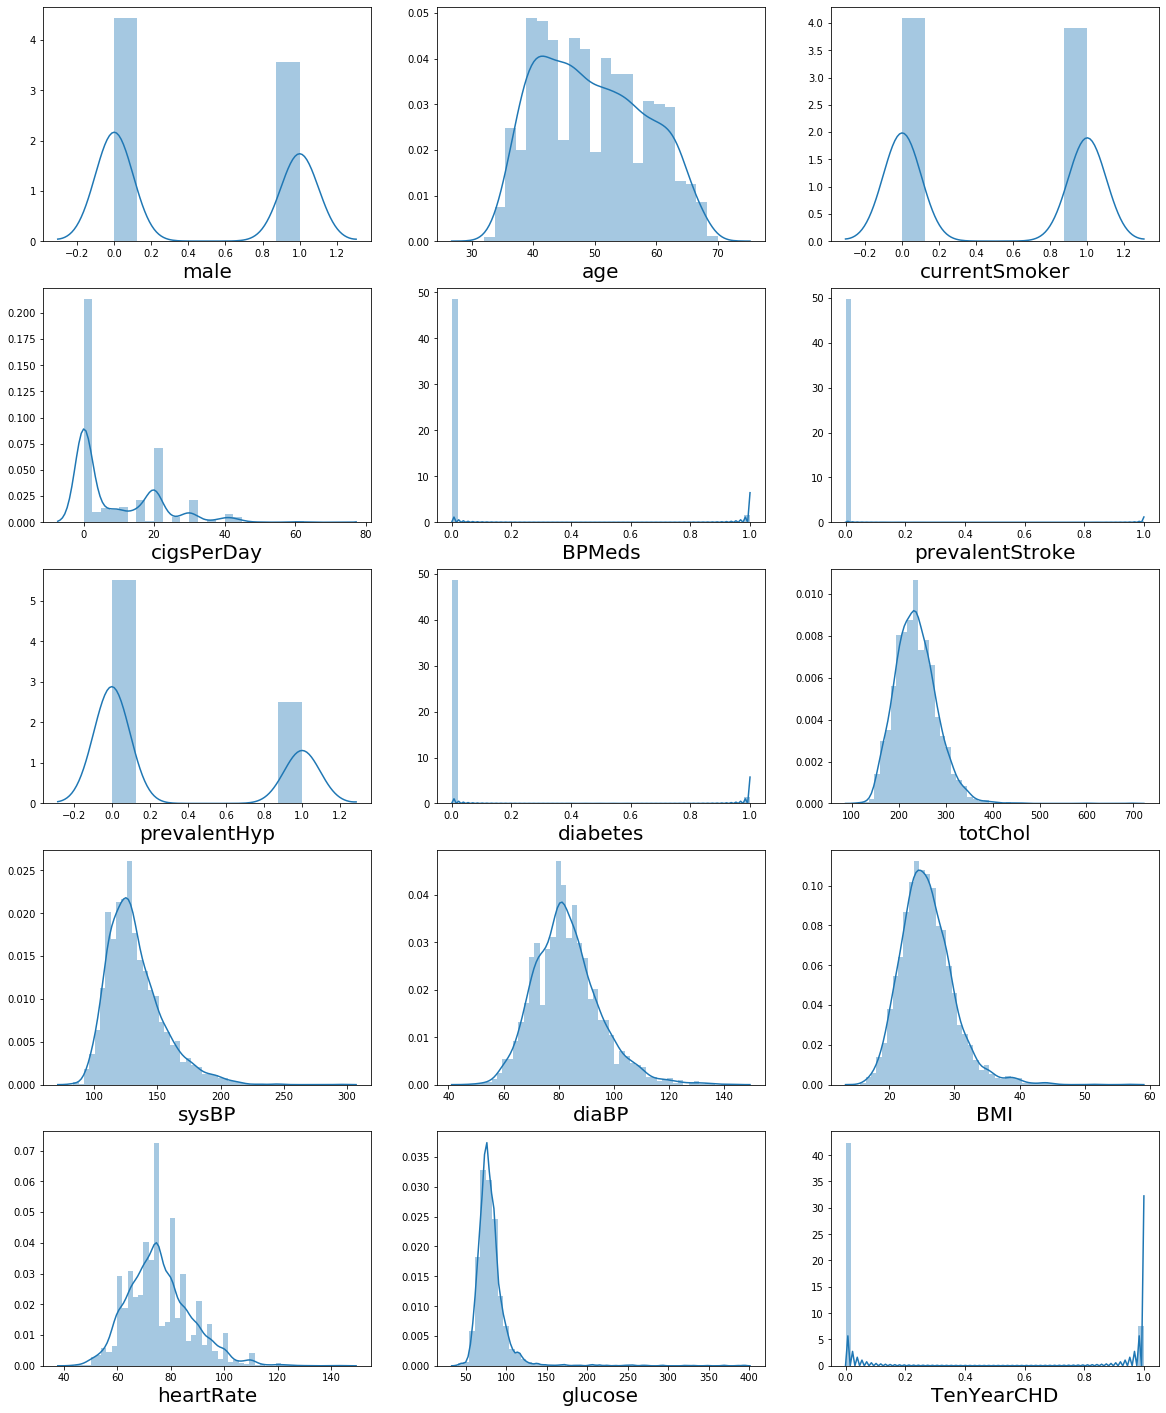

0    3179
1     572
Name: TenYearCHD, dtype: int64

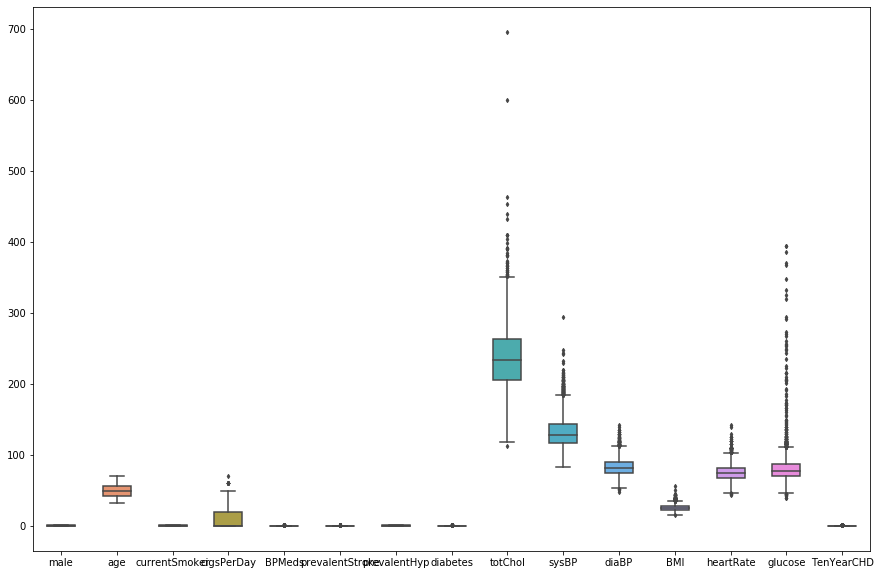

In [26]:
#Importing The necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import binarize
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

 # Read the data set
df =pd.read_csv('heart_disease.csv')

# check the head of the data 
df.head()

# Shape of the data set
df.shape

df.info()

df.drop(['education'],axis=1,inplace=True)

# Check for Null Values
df.isnull().sum()


df.dropna(axis=0,inplace=True)

#EDA

df.describe()


# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=16 :     # as there are 15 columns in the data
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()



# Check for outliers
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

df.TenYearCHD.value_counts()




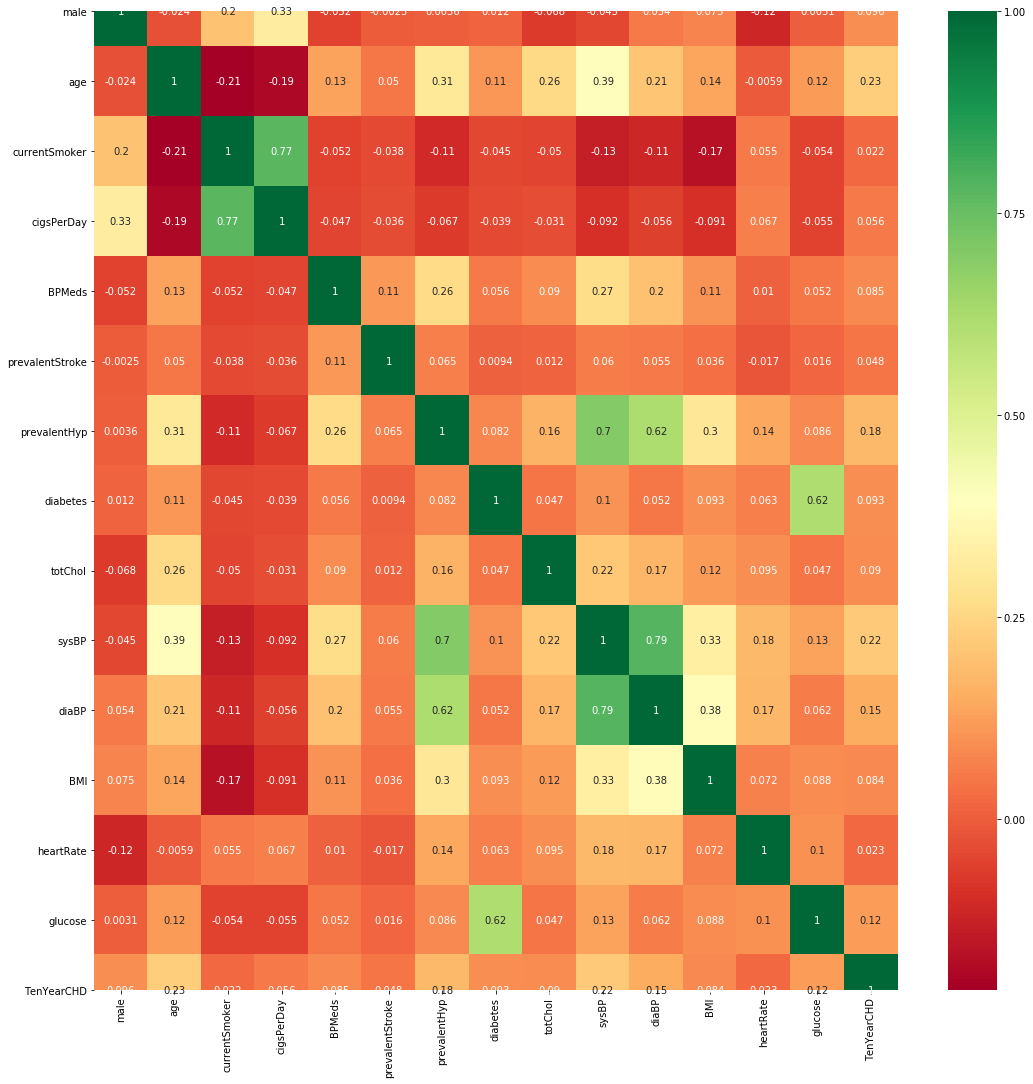

In [27]:
# Finding the correlation of the between independent and dependent variable
plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

plt.show()


- **Obsevation** 
- Diabetes and glucose are highly corelated ,Need to drop diabetes coloums because the target variale is highly dependent on glucose coloumn
- SysBP, prevalentHyp and dialBP are highly corelated ,Need to drop prevalentHyp and diaBP coloums because the target variale is highly dependent on SysBP coloumn
- Drop all the values less than 0.09

In [28]:
# Divide the data into dependent and independent variable
X=df.iloc[:,:-1] # Independent variables
y=df.iloc[:,-1]



In [29]:
from sklearn.model_selection import train_test_split,GridSearchCV
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.20, random_state= 5)

In [30]:
from sklearn.tree import DecisionTreeClassifier
#let's first visualize the tree on the data without doing any pre processing
DT_clf = DecisionTreeClassifier()
DT_clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [32]:
#Prediction of train data
pred_DT_train = DT_clf.predict(x_train)

# Accuracy of train data
accuracy_DT_train = accuracy_score(y_train,pred_DT_train)
print('accuracy_DT_train', accuracy_DT_train)

#Prediction of test data
pred_DT_test = DT_clf.predict(x_test)

# Accuracy of test data
accuracy_DT_test = accuracy_score(y_test,pred_DT_test)
print('accuracy_DT_test', DT_Score_test)

accuracy_DT_train 1.0
accuracy_DT_test 0.7736351531291611


### **Metrics**

In [34]:
# Confusion Matrix
conf_mat_DT = confusion_matrix(y_test,pred_DT_test)
conf_mat_DT

array([[557, 102],
       [ 70,  22]], dtype=int64)

In [35]:
true_positive_DT = conf_mat_DT[0][0]
false_positive_DT = conf_mat_DT[0][1]
false_negative_DT = conf_mat_DT[1][0]
true_negative_DT = conf_mat_DT[1][1]

In [36]:
# Precison log reg
Precision_DT = true_positive_DT/(true_positive_DT+false_positive_DT)
# Recall log reg
Recall_DT = true_positive_DT/(true_positive_DT+false_negative_DT) 
# F1 Score of log reg
F1_Score_DT = 2*(Recall_DT * Precision_DT) / (Recall_DT + Precision_DT)
print('Precision_DT',Precision_DT)
print('Recall_DT', Recall_DT)
print ('F1_Score_DT',F1_Score_DT)

Precision_DT 0.8452200303490136
Recall_DT 0.8883572567783095
F1_Score_DT 0.8662519440124415


## **Area Under The Curve (AUC)**
The area under the ROC curve quantifies model classification accuracy; the higher the area, the greater the disparity between true and false positives, and the stronger the model in classifying members of the training dataset. An area of 0.5 corresponds to a model that performs no better than random classification and a good classifier stays as far away from that as possible. An area of 1 is ideal. The closer the AUC to 1 the better

In [37]:
# Area Under Curve
auc_DT= roc_auc_score(y_test, pred_DT_test)
auc_DT

0.5421752325658111

In [38]:
fpr, tpr, thresholds = roc_curve(y_test, pred_DT_test)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=1.000000, G-Mean=0.450


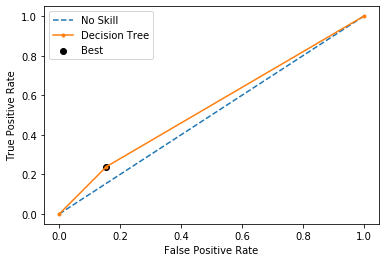

In [39]:
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Decision Tree')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [41]:
#Prediction probability of test data
pred_prob_DT_test = DT_clf.predict_proba(x_test)



In [43]:
fpr, tpr, thresholds = roc_curve(y_test, pred_prob_DT_test[:,1])

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=1.000000, G-Mean=0.450


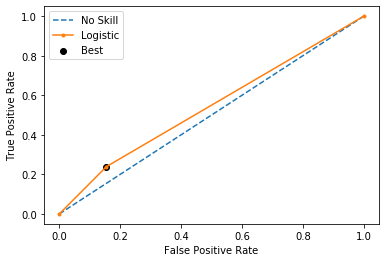

In [44]:
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [76]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [77]:
grid_search = GridSearchCV(estimator=DT_clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [78]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'm

In [79]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}


In [80]:
grid_search.best_score_

0.8426666666666667

In [81]:
DT_clf_final = DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_leaf=4,min_samples_split=2, splitter='best')

In [82]:
DT_clf_final.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [83]:
#Prediction of train data
pred_DT_train_final = DT_clf_final.predict(x_train)

# Accuracy of train data
accuracy_DT_train_final = accuracy_score(y_train,pred_DT_train_final)
print('accuracy_DT_train', accuracy_DT_train_final)

#Prediction of test data
pred_DT_test_final = DT_clf_final.predict(x_test)

# Accuracy of test data
accuracy_DT_test_final = accuracy_score(y_test,pred_DT_test_final)
print('accuracy_DT_test', accuracy_DT_test_final)

accuracy_DT_train 0.844
accuracy_DT_test 0.8668442077230359


conf_mat_DT [[642  17]
 [ 83   9]]
Precision_DT1 0.9742033383915023
Recall_DT 0.8855172413793103
F1_Score_DT 0.9277456647398845
auc_DT 0.536014712674012
Best Threshold=1.000000, G-Mean=0.309


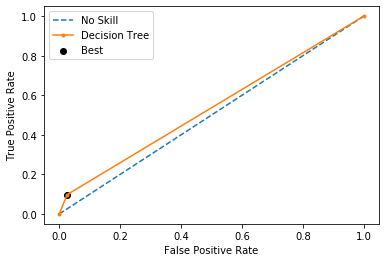

In [84]:
# Confusion Matrix
conf_mat_DT1 = confusion_matrix(y_test,pred_DT_test_final)
print('conf_mat_DT',conf_mat_DT1)

true_positive_DT1 = conf_mat_DT1[0][0]
false_positive_DT1 = conf_mat_DT1[0][1]
false_negative_DT1 = conf_mat_DT1[1][0]
true_negative_DT1 = conf_mat_DT1[1][1]

# Precison log reg
Precision_DT1 = true_positive_DT1/(true_positive_DT1+false_positive_DT1)
# Recall log reg
Recall_DT1 = true_positive_DT1/(true_positive_DT1+false_negative_DT1) 
# F1 Score of log reg
F1_Score_DT1 = 2*(Recall_DT1 * Precision_DT1) / (Recall_DT1 + Precision_DT1)
print('Precision_DT1',Precision_DT1)
print('Recall_DT', Recall_DT1)
print ('F1_Score_DT',F1_Score_DT1)

# Area Under Curve
auc_DT1= roc_auc_score(y_test, pred_DT_test_final)
print('auc_DT',auc_DT1)

fpr, tpr, thresholds = roc_curve(y_test, pred_DT_test_final)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))


# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Decision Tree')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()


